In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn
!pip install pillow


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from google.colab import files
uploaded = files.upload()  # upload a .zip file

import zipfile
import os

# Find the uploaded zip file (replace with your actual filename if needed)
zip_name = next(iter(uploaded.keys()))
print("Uploaded file:", zip_name)

# Check if it really is a zip file
if zipfile.is_zipfile(zip_name):
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall('/content/data')
    print("Extraction complete!")
else:
    print("This file is not a valid ZIP file!")


Saving archive (5).zip to archive (5) (2).zip
Uploaded file: archive (5) (2).zip
Extraction complete!


In [ ]:
# Walk through extracted folders to find where your images are
for root, dirs, files in os.walk('/content/data'):
    print('Directory:', root)
    image_files = [f for f in files if f.lower().endswith(('.jpg','.png','.jpeg'))]
    print(f'  Found {len(image_files)} image files')
    if image_files:
        print('  Sample files:', image_files[:5])


Directory: /content/data
  Found 790 image files
  Sample files: ['anadenanthera_23.jpg', 'mabea_23.jpg', 'myrcia_31.jpg', 'anadenanthera_32.jpg', 'chromolaena_22.jpg']


In [ ]:
# Example if images are in /content/data
path = '/content/data'

# Example if images are in /content/data/somefolder
# path = '/content/data/somefolder'


Class distribution: Counter({'mabea': 35, 'myrcia': 35, 'chromolaena': 35, 'mimosa': 35, 'matayba': 35, 'croton': 35, 'combretum': 35, 'hyptis': 35, 'schinus': 35, 'serjania': 35, 'dipteryx': 35, 'syagrus': 35, 'urochloa': 35, 'qualea': 35, 'arecaceae': 35, 'tridax': 35, 'senegalia': 35, 'arrabidaea': 35, 'eucalipto': 35, 'cecropia': 35, 'faramea': 35, 'protium': 35, 'anadenanthera': 20})


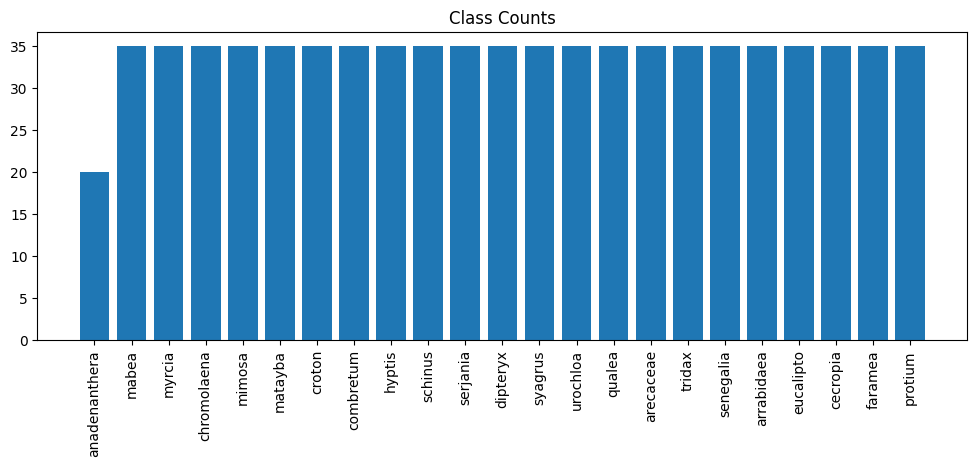

In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Update this to your folder (adjust if images are in a subfolder)
path = '/content/data'

# List image files
names = [name for name in os.listdir(path) if name.lower().endswith(('.jpg','.jpeg','.png'))]

# Get class label from filename (assumes label is before first underscore)
labels = [name.replace(' ', '_').split('_')[0] for name in names]

# Visualize class counts
classes = Counter(labels)
print("Class distribution:", classes)

plt.figure(figsize=(12,4))
plt.bar(classes.keys(), classes.values())
plt.title("Class Counts")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import cv2
import numpy as np

def process_img(img, size=(128,128)):
    img = cv2.resize(img, size)
    img = img / 255.0
    return img

X, y = [], []
for name in names:
    img = cv2.imread(os.path.join(path, name))
    if img is None: continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = process_img(img)
    X.append(img)
    y.append(name.replace(' ', '_').split('_')[0])

X = np.array(X)
y = np.array(y)
print("X shape:", X.shape, "y shape:", y.shape)


X shape: (790, 128, 128, 3) y shape: (790,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y, random_state=42
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)
print("Number of classes:", y_cat.shape[1])


Train set: (632, 128, 128, 3) Test set: (158, 128, 128, 3)
Number of classes: 23


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = X_train.shape[1:]

model = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(2,2),
    Conv2D(32, (2,2), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64, (2,2), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (2,2), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dense(150, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True
)
datagen.fit(X_train)

batch_size = 4
epochs = 100

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.0345 - loss: 3.1503

158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.0347 - loss: 3.1499 - val_accuracy: 0.1139 - val_loss: 2.8629
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.0863 - loss: 2.7819 - val_accuracy: 0.0759 - val_loss: 2.9505
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.1207 - loss: 2.6419

158/158 ━━━━━━━━━━━━━━━━━━━━ 29s 185ms/step - accuracy: 0.1208 - loss: 2.6419 - val_accuracy: 0.1646 - val_loss: 2.5760
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1051 - loss: 2.5603

158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step - accuracy: 0.1053 - loss: 2.5601 - val_accuracy: 0.1709 - val_loss: 2.3928
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.1385 - loss: 2.4374

158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - accuracy: 0.1385 - loss: 2.4374 - val_accuracy: 0.1899 - val_loss: 2.2695
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.1475 - loss: 2.3591 - val_accuracy: 0.1519 - val_loss: 2.2904
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1935 - loss: 2.2573

158/158 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.1937 - loss: 2.2571 - val_accuracy: 0.2658 - val_loss: 2.1399
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.2262 - loss: 2.2347 - val_accuracy: 0.2785 - val_loss: 2.1483
Epoch 9/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.2310 - loss: 2.2073

158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.2309 - loss: 2.2071 - val_accuracy: 0.2785 - val_loss: 1.9883
Epoch 10/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.2453 - loss: 2.0888 - val_accuracy: 0.3291 - val_loss: 2.0064
Epoch 11/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.2683 - loss: 2.0142

158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.2683 - loss: 2.0144 - val_accuracy: 0.3481 - val_loss: 1.9044
Epoch 12/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2931 - loss: 1.9363

158/158 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step - accuracy: 0.2931 - loss: 1.9367 - val_accuracy: 0.3354 - val_loss: 1.8770
Epoch 13/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.2938 - loss: 1.9517

158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.2937 - loss: 1.9516 - val_accuracy: 0.3861 - val_loss: 1.7474
Epoch 14/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2979 - loss: 1.9415

158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.2981 - loss: 1.9412 - val_accuracy: 0.3924 - val_loss: 1.7267
Epoch 15/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.3799 - loss: 1.8609

158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.3798 - loss: 1.8607 - val_accuracy: 0.4051 - val_loss: 1.6197
Epoch 16/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.3968 - loss: 1.6871 - val_accuracy: 0.3291 - val_loss: 1.8177
Epoch 17/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 164ms/step - accuracy: 0.3615 - loss: 1.8472 - val_accuracy: 0.3797 - val_loss: 1.6437
Epoch 18/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3932 - loss: 1.6626

158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.3931 - loss: 1.6631 - val_accuracy: 0.5063 - val_loss: 1.4798
Epoch 19/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3931 - loss: 1.6940

158/158 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.3932 - loss: 1.6938 - val_accuracy: 0.4747 - val_loss: 1.4323
Epoch 20/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 32s 203ms/step - accuracy: 0.4424 - loss: 1.4890 - val_accuracy: 0.4430 - val_loss: 1.5967
Epoch 21/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.4579 - loss: 1.4681

158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.4578 - loss: 1.4684 - val_accuracy: 0.4937 - val_loss: 1.3289
Epoch 22/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5029 - loss: 1.4002

158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.5027 - loss: 1.4005 - val_accuracy: 0.5063 - val_loss: 1.3070
Epoch 23/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.4664 - loss: 1.5223 - val_accuracy: 0.5127 - val_loss: 1.3645
Epoch 24/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.4634 - loss: 1.3935 - val_accuracy: 0.4937 - val_loss: 1.4437
Epoch 25/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.5323 - loss: 1.2668

158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.5322 - loss: 1.2673 - val_accuracy: 0.5949 - val_loss: 1.2172
Epoch 26/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5634 - loss: 1.2696

158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 171ms/step - accuracy: 0.5634 - loss: 1.2694 - val_accuracy: 0.5570 - val_loss: 1.1693
Epoch 27/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5931 - loss: 1.2077

158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.5928 - loss: 1.2080 - val_accuracy: 0.6392 - val_loss: 1.0105
Epoch 28/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.5694 - loss: 1.2175 - val_accuracy: 0.5949 - val_loss: 1.1138
Epoch 29/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - accuracy: 0.6050 - loss: 1.1073 - val_accuracy: 0.6329 - val_loss: 1.0506
Epoch 30/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.6346 - loss: 1.0870 - val_accuracy: 0.5886 - val_loss: 1.0867
Epoch 31/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.6064 - loss: 1.0342 - val_accuracy: 0.6266 - val_loss: 1.0812
Epoch 32/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5750 - loss: 1.1183

158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.5752 - loss: 1.1180 - val_accuracy: 0.6392 - val_loss: 0.9107
Epoch 33/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.5870 - loss: 1.0911 - val_accuracy: 0.6203 - val_loss: 0.9819
Epoch 34/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6407 - loss: 0.9611

158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.6408 - loss: 0.9611 - val_accuracy: 0.6899 - val_loss: 0.8501
Epoch 35/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.6356 - loss: 0.9574 - val_accuracy: 0.5633 - val_loss: 1.0680
Epoch 36/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.6216 - loss: 1.0630 - val_accuracy: 0.5823 - val_loss: 1.0345
Epoch 37/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.6558 - loss: 0.9490 - val_accuracy: 0.6266 - val_loss: 0.9201
Epoch 38/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6362 - loss: 0.9622

158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.6363 - loss: 0.9622 - val_accuracy: 0.6709 - val_loss: 0.8467
Epoch 39/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6865 - loss: 0.9025

158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.6865 - loss: 0.9025 - val_accuracy: 0.7089 - val_loss: 0.7708
Epoch 40/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.7241 - loss: 0.8165 - val_accuracy: 0.6582 - val_loss: 0.8207
Epoch 41/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.6737 - loss: 0.8413 - val_accuracy: 0.6709 - val_loss: 0.9488
Epoch 42/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7166 - loss: 0.7730

158/158 ━━━━━━━━━━━━━━━━━━━━ 45s 173ms/step - accuracy: 0.7164 - loss: 0.7734 - val_accuracy: 0.7342 - val_loss: 0.7413
Epoch 43/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.6969 - loss: 0.9097 - val_accuracy: 0.6899 - val_loss: 0.8377
Epoch 44/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.7028 - loss: 0.8285 - val_accuracy: 0.6709 - val_loss: 0.8536
Epoch 45/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.7274 - loss: 0.7874 - val_accuracy: 0.6139 - val_loss: 1.1958
Epoch 46/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 160ms/step - accuracy: 0.6619 - loss: 0.8830 - val_accuracy: 0.6392 - val_loss: 0.9698
Epoch 47/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 38s 142ms/step - accuracy: 0.7127 - loss: 0.7943 - val_accuracy: 0.7089 - val_loss: 0.8677
Epoch 48/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 44s 160ms/step - accuracy: 0.7487 - loss: 0.6693 - val_accuracy: 0.7278 - val_loss: 0.9182
Epoch 49/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 160ms/step - accuracy: 0.7142 - loss

158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.6424 - loss: 1.0504 - val_accuracy: 0.7468 - val_loss: 0.6819
Epoch 51/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 145ms/step - accuracy: 0.7457 - loss: 0.7139 - val_accuracy: 0.7848 - val_loss: 0.6937
Epoch 52/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.7464 - loss: 0.6405 - val_accuracy: 0.7278 - val_loss: 0.8045
Epoch 53/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - accuracy: 0.7706 - loss: 0.6597 - val_accuracy: 0.7658 - val_loss: 0.7009
Epoch 54/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.7946 - loss: 0.5875 - val_accuracy: 0.7532 - val_loss: 0.7593
Epoch 55/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.7842 - loss: 0.6068 - val_accuracy: 0.7658 - val_loss: 0.7582
Epoch 56/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7871 - loss: 0.5731

158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.7870 - loss: 0.5734 - val_accuracy: 0.7785 - val_loss: 0.6263
Epoch 57/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.7775 - loss: 0.6033 - val_accuracy: 0.7405 - val_loss: 0.7840
Epoch 58/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7287 - loss: 0.7010

158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 145ms/step - accuracy: 0.7290 - loss: 0.7009 - val_accuracy: 0.7848 - val_loss: 0.6255
Epoch 59/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 43s 155ms/step - accuracy: 0.7944 - loss: 0.5460 - val_accuracy: 0.7342 - val_loss: 0.8336
Epoch 60/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.7670 - loss: 0.6262 - val_accuracy: 0.7342 - val_loss: 0.8170
Epoch 61/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.7686 - loss: 0.6735 - val_accuracy: 0.6835 - val_loss: 0.8541
Epoch 62/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.8223 - loss: 0.5515 - val_accuracy: 0.7595 - val_loss: 0.6671
Epoch 63/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - accuracy: 0.7777 - loss: 0.5698 - val_accuracy: 0.8228 - val_loss: 0.6403
Epoch 64/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.7571 - loss: 0.6701 - val_accuracy: 0.7532 - val_loss: 0.7277
Epoch 65/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.8208 - loss

158/158 ━━━━━━━━━━━━━━━━━━━━ 38s 146ms/step - accuracy: 0.8048 - loss: 0.5435 - val_accuracy: 0.7911 - val_loss: 0.5423
Epoch 69/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 161ms/step - accuracy: 0.8619 - loss: 0.4509 - val_accuracy: 0.7722 - val_loss: 0.5779
Epoch 70/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 158ms/step - accuracy: 0.8355 - loss: 0.4359 - val_accuracy: 0.7785 - val_loss: 0.5695
Epoch 71/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.8244 - loss: 0.5050 - val_accuracy: 0.7722 - val_loss: 0.6799
Epoch 72/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.8142 - loss: 0.5676 - val_accuracy: 0.7278 - val_loss: 0.8374
Epoch 73/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8206 - loss: 0.5275

158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.8206 - loss: 0.5273 - val_accuracy: 0.8228 - val_loss: 0.5412
Epoch 74/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.8806 - loss: 0.3823 - val_accuracy: 0.7342 - val_loss: 1.0129
Epoch 75/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.8188 - loss: 0.5688 - val_accuracy: 0.8228 - val_loss: 0.5438
Epoch 76/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8470 - loss: 0.4066

158/158 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.8470 - loss: 0.4068 - val_accuracy: 0.8291 - val_loss: 0.5288
Epoch 77/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 155ms/step - accuracy: 0.8615 - loss: 0.3847 - val_accuracy: 0.8038 - val_loss: 0.6196
Epoch 78/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.8546 - loss: 0.4205 - val_accuracy: 0.7975 - val_loss: 0.7941
Epoch 79/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.8332 - loss: 0.4875 - val_accuracy: 0.8038 - val_loss: 0.5978
Epoch 80/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.8953 - loss: 0.3122 - val_accuracy: 0.8291 - val_loss: 0.6760
Epoch 81/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.8578 - loss: 0.3928 - val_accuracy: 0.8291 - val_loss: 0.6010
Epoch 82/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.8481 - loss: 0.4168 - val_accuracy: 0.8038 - val_loss: 0.5931
Epoch 83/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - accuracy: 0.8546 - loss

In [24]:
score = model.evaluate(X_test, y_test)
print("Test accuracy:", score[1])


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.7816 - loss: 0.6623
Test accuracy: 0.8291139006614685


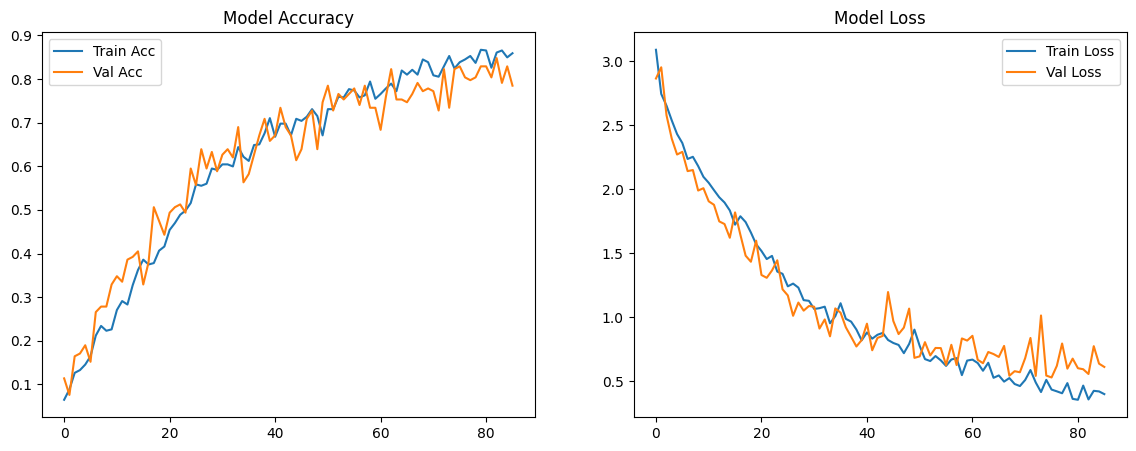

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [26]:
model.save('model.h5')


Saving faramea_06.jpg to faramea_06.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted Class: faramea


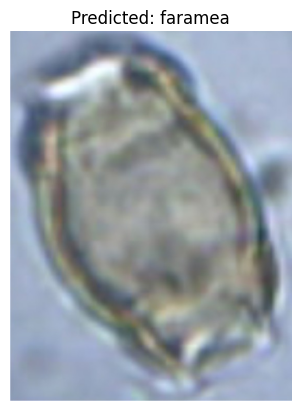

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files

# Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = load_img(img_path, target_size=(128,128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Load model if not in memory
model = load_model('model.h5')

# Predict
pred = model.predict(img_array)
pred_class_idx = np.argmax(pred)
pred_class = le.inverse_transform([pred_class_idx])[0]

print(f'Predicted Class: {pred_class}')
plt.imshow(load_img(img_path))
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()
